In [1]:
import pueo
from matplotlib import pyplot as plt
import numpy as np
from physt import binnings, h1
from scipy import signal

In [2]:
sim = pueo.PUEO()
lp3 = signal.cheby1(3, 0.5, 0.8, btype='lowpass', output='sos')
lpzi = signal.sosfilt_zi(lp3)

In [6]:
sim.setNotch(True, 380., 5)
ev2 = sim.get(5, cwsnr=5, cwfreq=380)
if sim.notch is not None:
    ev, evzi = signal.sosfilt(sim.notch, ev2, zi=sim.notchzi)
else:
    ev = ev2
phase = np.random.randint(0,8)
evlp = sim.trigger_filter(ev, int(phase/4))
power = np.square(evlp)
pavg = sim.average8(power, phase % 4)
plp = sim.decimate4(power, phase % 4, alt=True)
pop = sim.optimize4(power, phase % 4)
#plp2 , plp2zf = signal.sosfilt(lp3, plp, zi=lpzi)

<IPython.core.display.Javascript object>


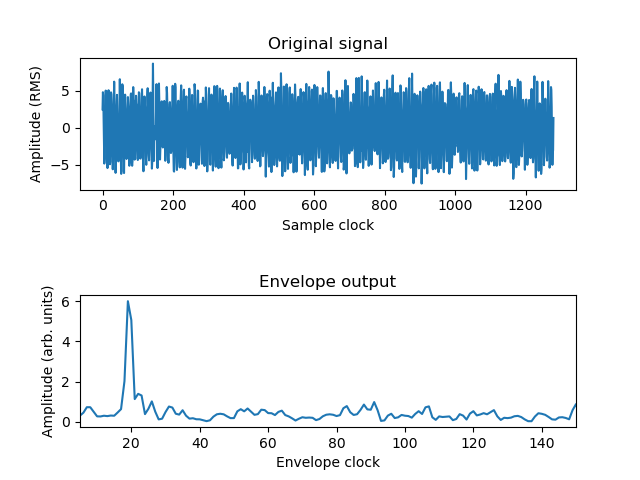

Text(0.5, 0, 'Envelope clock')

In [13]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot('211')
ax2 = fig.add_subplot('212')
fig.subplots_adjust(hspace=0.8)
ax1.plot(ev2)
ax1.title.set_text('Original signal')
ax1.set_ylabel('Amplitude (RMS)')
ax1.set_xlabel('Sample clock')
ax2.plot(pop)
ax2.title.set_text('Envelope output')
ax2.set_xlim(5,150)
ax2.set_ylabel('Amplitude (arb. units)')
ax2.set_xlabel('Envelope clock')
# ax3.plot(pop)
# ax3.title.set_text('Decimation w/alt')
# ax4.plot(pop)
# ax4.title.set_text('Optimized envelope')

In [ ]:
noise_avg = None
noise_lp = None
noise_lpalt = None
noise_popt = None
for i in range(10000):
    ev = sim.get(0)
    phase = np.random.randint(0,8)
    evlp = sim.trigger_filter(ev, int(phase/4))
    power = np.square(evlp)
    pavg = sim.average8(power, phase % 4)
    plp = sim.decimate4(power, phase % 4)
    popt = sim.optimize4(power, phase % 4)
    plpalt = sim.decimate4(power, phase % 4, alt=True)
    if noise_avg is None:
        noise_avg = pavg[20:120]
        noise_lp = plp[20:120]
        noise_lpalt = plpalt[20:120]
        noise_popt = popt[20:120]
    else:
        noise_avg = np.append(noise_avg, pavg[20:120])
        noise_lp = np.append(noise_lp, plp[20:120])
        noise_lpalt = np.append(noise_lpalt, plpalt[20:120])
        noise_popt = np.append(noise_popt, popt[20:120])

In [ ]:
navgh = h1(noise_avg, "fixed_width", bin_width=0.25)
navglp = h1(noise_lp, "fixed_width", bin_width=0.25)
navglpalt = h1(noise_lpalt, "fixed_width", bin_width=0.25)
nopt = h1(noise_popt, "fixed_width", bin_width=0.25)
nfig = plt.figure()
nfig.subplots_adjust(hspace=0.8)
nax0 = nfig.add_subplot('411')
nax1 = nfig.add_subplot('412')
nax2 = nfig.add_subplot('413')
nax3 = nfig.add_subplot('414')
nax0.title.set_text('Noise distribution (average)')
nax1.title.set_text('Noise distribution (decimation)')
nax2.title.set_text('Noise distribution (decimate w/IIR)')
nax3.title.set_text('Noise distribution (optimal IIR)')
navgh.plot(yscale="log", ax=nax0)
navglp.plot(yscale="log", ax=nax1)
navglpalt.plot(yscale="log", ax=nax2)
nopt.plot(yscale="log", ax=nax3)
nax0.set_xlim([0,5])
nax0.set_xlabel("Amplitude (RMS units)")
nax1.set_xlim([0,5])
nax1.set_xlabel("Amplitude (RMS units)")
nax2.set_xlim([0,5])
nax2.set_xlabel("Amplitude (RMS units)")
nax3.set_xlim([0,5])
nax3.set_xlabel("Amplitude (RMS units)")

In [ ]:
sig_avg = None
sig_lp = None
sig_lpalt = None
sig_popt = None
for i in range(10000):
    ev = sim.get(5)
    phase = np.random.randint(0,8)
    evlp = sim.trigger_filter(ev, int(phase/4))
    power = np.square(evlp)
    pavg = sim.average8(power, phase % 4)
    plp = sim.decimate4(power, phase % 4)
    popt = sim.optimize4(power, phase % 4)
    plpalt = sim.decimate4(power, phase % 4, alt=True)
    if sig_avg is None:
        sig_avg = np.amax(pavg)
        sig_lp = np.amax(plp)
        sig_lpalt = np.amax(plpalt)
        sig_popt = np.amax(popt)
    else:
        sig_avg = np.append(sig_avg,np.amax(pavg))
        sig_lp = np.append(sig_lp,np.amax(plp))
        sig_lpalt = np.append(sig_lpalt,np.amax(plpalt))
        sig_popt = np.append(sig_popt, np.amax(popt))

In [ ]:
savgh = h1(sig_avg, "fixed_width", bin_width=0.25)
savglp = h1(sig_lp, "fixed_width", bin_width=0.25)
slpalt = h1(sig_popt, "fixed_width", bin_width=0.25)
sfig = plt.figure()
sfig.subplots_adjust(hspace=0.8)
sax0 = sfig.add_subplot('311')
sax1 = sfig.add_subplot('312')
sax2 = sfig.add_subplot('313')
sax0.title.set_text('SNR=5 distribution (average)')
sax1.title.set_text('SNR=5 distribution (decimation)')
sax2.title.set_text('SNR=5 distribution (optimal IIR)')
savgh.plot(yscale="log", ax=sax0)
savglp.plot(yscale="log", ax=sax1)
slpalt.plot(yscale="log", ax=sax2)
sax0.set_xlim([0,20])
sax0.set_xlabel("Amplitude (RMS units)")
sax1.set_xlim([0,20])
sax1.set_xlabel("Amplitude (RMS units)")
sax2.set_xlim([0,20])
sax2.set_xlabel("Amplitude (RMS units)")

In [ ]:
sig_avg = None
sig_lp = None
sig_lpalt = None
sig_popt = None
for i in range(10000):
    ev = sim.get(5)
    phase = np.random.randint(0,8)
    evlp = sim.trigger_filter(ev, int(phase/4))
    power = np.square(evlp)
    pavg = sim.average8(power, phase % 4)
    plp = sim.decimate4(power, phase % 4)
    plpalt = sim.decimate4(power, phase % 4, alt=True)
    popt = sim.optimize4(power, phase % 4)
    if sig_avg is None:
        sig_avg = np.sqrt(np.amax(pavg))
        sig_lp = np.sqrt(np.amax(plp))
        sig_lpalt = np.sqrt(np.amax(plpalt))
        sig_popt = np.sqrt(np.amax(popt))
    else:
        sig_avg = np.append(sig_avg,np.sqrt(np.amax(pavg)))
        sig_lp = np.append(sig_lp,np.sqrt(np.amax(plp)))
        sig_lpalt = np.append(sig_lpalt, np.sqrt(np.amax(plpalt)))
        sig_popt = np.append(sig_popt, np.sqrt(np.amax(popt)))

In [ ]:
savgh2 = h1(sig_avg, "fixed_width", bin_width=0.125)
savglp2 = h1(sig_lp, "fixed_width", bin_width=0.125)
savglp3 = h1(sig_lpalt, "fixed_width", bin_width=0.125)
sopt = h1(sig_popt, "fixed_width", bin_width=0.125)
sfig = plt.figure()
sfig.subplots_adjust(hspace=0.8)
sax0 = sfig.add_subplot('311')
sax1 = sfig.add_subplot('312')
sax2 = sfig.add_subplot('313')
sax0.title.set_text('SNR=5 distribution (average)')
sax1.title.set_text('SNR=5 distribution (decimation)')
sax2.title.set_text('SNR=5 distribution (optimal)')
savgh2.plot(ax=sax0)
savglp2.plot(ax=sax1)
sopt.plot(ax=sax2)
sax0.set_xlim([1,5])
sax0.set_xlabel("Amplitude")
sax1.set_xlim([1,5])
sax1.set_xlabel("Amplitude")
sax2.set_xlim([1,5])
sax2.set_xlabel("Amplitude")

In [ ]:
from scipy import signal
lp3 = signal.cheby1(3, 0.5, 0.8, btype='lowpass', output='sos')
lpzi = signal.sosfilt_zi(lp3)
hp = signal.butter(3, 0.00533333333333333333333333333333, btype='highpass', output='sos')
hpzi = signal.sosfilt_zi(hp)

In [ ]:
ev2 = sim.get(5)
phase2 = np.random.randint(0,8)
evlp2 = sim.trigger_filter(ev2, int(phase2/4))
power2 = np.square(evlp2)
pavg = sim.average8(power2, phase2 % 4)
plp = sim.decimate4(power2, phase2 % 4)
p2lp, p2lpzf = signal.sosfilt(lp3, plp, zi=lpzi)
php, phpzf = signal.sosfilt(hp, plp, zi=hpzi)

In [ ]:
cfig = plt.figure()
cax1 = cfig.add_subplot('411')
cax2 = cfig.add_subplot('412')
cax3 = cfig.add_subplot('413')
cax4 = cfig.add_subplot('414')
cax1.plot(ev2)
cax2.plot(pavg)
cax3.plot(plp)
cax4.plot(p2lp)

In [ ]:
print(np.amax(p2lp)/np.amax(plp))


In [ ]:
print(np.std(p2lp[20:120])/np.std(plp[20:120]))

In [ ]:
navglpalt.frequencies

In [ ]:
navglpalt.bins

In [ ]:
print(np.average(sig_lpalt)/np.average(sig_avg))